In [179]:
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
import random
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import clear_output
from scipy.interpolate import interp1d
from datetime import datetime
import os

import numpy as np
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
tfd = tfp.distributions

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten

Num GPUs Available:  1


In [180]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [181]:
z_max = 4

train_array = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_v1.csv')
train_array.drop(columns=['Unnamed: 0'], inplace=True)
train_array = np.asarray(train_array)

test_array = pd.read_csv('/mnt/data/HSC/3_model_comparison/testing_v1.csv')
test_array.drop(columns=['Unnamed: 0'], inplace=True)
test_array = np.asarray(train_array)

In [182]:
OID_test = test_array[:,0]
X_test = test_array[:,[12,13,14,15,16]]
y_test = test_array[:,2]

In [183]:
sample_array = [1, 1, 1, 1]

In [184]:
nnetwork = 7

In [185]:
X_total = list(train_array[:,[12,13,14,15,16]])
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_total)

MinMaxScaler()

In [186]:
X = []
y = []

for i in range(2, nnetwork + 2):
    training_array_bin = pd.read_csv('/mnt/data/HSC/3_model_comparison/training_set_'+str(sample_array)+'#'+str(i)+'.csv')
    training_array_bin.drop(columns=['Unnamed: 0'], inplace=True)
    training_array_bin = np.asarray(training_array_bin)
    X_bin = list(training_array_bin[:,[12,13,14,15,16]])
    X_bin = scaler.transform(X_bin)
    y_bin = list(training_array_bin[:,2])
    X.append(X_bin)
    y.append(y_bin)
X = np.asarray(X)
y = np.asarray(y)

In [187]:
nensemble = 6

In [188]:
models = []

for i in range(0,nensemble):
    input_ = tf.keras.layers.Input(shape=X[0].shape[1:])
    hidden1 = tf.keras.layers.Dense(200, activation="tanh")(input_)
    hidden2 = tf.keras.layers.Dense(200, activation="tanh")(hidden1)
    hidden3 = tf.keras.layers.Dense(200, activation="tanh")(hidden2)
    hidden4 = tf.keras.layers.Dense(200, activation="relu")(hidden3)
    concat = tf.keras.layers.Concatenate()([input_, hidden4])
    output = tf.keras.layers.Dense(1)(concat)
    model = tf.keras.Model(inputs=[input_], outputs=[output])
    model.compile(optimizer='Adam', loss="mse",metrics=[tf.keras.metrics.MeanAbsoluteError()])
    models.append(model)

In [189]:
for i in range(0, nensemble):
    models[i].fit(X[i],y[i],epochs=50,shuffle = True,verbose=1)

Epoch 1/50
215/215 [==============================] - 1s 2ms/step - loss: 0.9523 - mean_absolute_error: 0.7929
Epoch 2/50
215/215 [==============================] - 0s 2ms/step - loss: 0.7444 - mean_absolute_error: 0.6688
Epoch 3/50
215/215 [==============================] - 0s 2ms/step - loss: 0.6923 - mean_absolute_error: 0.6345
Epoch 4/50
215/215 [==============================] - 0s 2ms/step - loss: 0.6179 - mean_absolute_error: 0.5946
Epoch 5/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5890 - mean_absolute_error: 0.5804
Epoch 6/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5573 - mean_absolute_error: 0.5572
Epoch 7/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5379 - mean_absolute_error: 0.5457
Epoch 8/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5260 - mean_absolute_error: 0.5383
Epoch 9/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5506 - mean_absolute_error: 0.5504
E

215/215 [==============================] - 0s 2ms/step - loss: 0.4465 - mean_absolute_error: 0.4787
Epoch 25/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4235 - mean_absolute_error: 0.4614
Epoch 26/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4795 - mean_absolute_error: 0.5000
Epoch 27/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4113 - mean_absolute_error: 0.4515
Epoch 28/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4472 - mean_absolute_error: 0.4721
Epoch 29/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4083 - mean_absolute_error: 0.4492
Epoch 30/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4758 - mean_absolute_error: 0.4982
Epoch 31/50
215/215 [==============================] - 0s 2ms/step - loss: 0.3989 - mean_absolute_error: 0.4371
Epoch 32/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4243 - mean_absolute_error: 0.4576
Epoc

215/215 [==============================] - 0s 2ms/step - loss: 0.4058 - mean_absolute_error: 0.4457
Epoch 48/50
215/215 [==============================] - 0s 2ms/step - loss: 0.3890 - mean_absolute_error: 0.4345
Epoch 49/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4088 - mean_absolute_error: 0.4464
Epoch 50/50
215/215 [==============================] - 0s 2ms/step - loss: 0.3925 - mean_absolute_error: 0.4286
Epoch 1/50
215/215 [==============================] - 1s 2ms/step - loss: 0.9719 - mean_absolute_error: 0.8100
Epoch 2/50
215/215 [==============================] - 0s 2ms/step - loss: 0.7378 - mean_absolute_error: 0.6631
Epoch 3/50
215/215 [==============================] - 0s 2ms/step - loss: 0.6577 - mean_absolute_error: 0.6177
Epoch 4/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5861 - mean_absolute_error: 0.5726
Epoch 5/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5448 - mean_absolute_error: 0.5518
Epoch 6/5

215/215 [==============================] - 0s 2ms/step - loss: 0.4387 - mean_absolute_error: 0.4775
Epoch 21/50
215/215 [==============================] - 0s 2ms/step - loss: 0.5047 - mean_absolute_error: 0.5189
Epoch 22/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4581 - mean_absolute_error: 0.4879
Epoch 23/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4656 - mean_absolute_error: 0.4913
Epoch 24/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4628 - mean_absolute_error: 0.4873
Epoch 25/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4390 - mean_absolute_error: 0.4663
Epoch 26/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4248 - mean_absolute_error: 0.4642
Epoch 27/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4518 - mean_absolute_error: 0.4789
Epoch 28/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4442 - mean_absolute_error: 0.4787
Epoc

215/215 [==============================] - 0s 2ms/step - loss: 0.4412 - mean_absolute_error: 0.4732
Epoch 44/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4667 - mean_absolute_error: 0.4899
Epoch 45/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4390 - mean_absolute_error: 0.4693
Epoch 46/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4330 - mean_absolute_error: 0.4609
Epoch 47/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4359 - mean_absolute_error: 0.4661
Epoch 48/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4242 - mean_absolute_error: 0.4526
Epoch 49/50
215/215 [==============================] - 0s 2ms/step - loss: 0.4211 - mean_absolute_error: 0.4526
Epoch 50/50
215/215 [==============================] - 0s 2ms/step - loss: 0.3960 - mean_absolute_error: 0.4304


In [190]:
y_predict = []
X_test = scaler.transform(X_test)

for i in range(0, nensemble):
    y_predict_single = models[i].predict(X_test)
    y_predict.append(np.transpose(y_predict_single)[0])

y_predict = np.transpose(y_predict)

In [191]:
mean_array = []
std_array = []
for i in range(0,len(X_test)):
    mean = np.mean(y_predict[i])
    std = np.std(y_predict[i])
    mean_array.append(mean)
    std_array.append(std)

In [192]:
from scipy.stats import gaussian_kde
xy = np.asarray(np.vstack([y_test,mean_array])).astype('float32')
z = gaussian_kde(xy)(xy)

In [193]:
overlap = 0
overlap_array = []
for i in range(0,len(X_test)):
    if np.abs(y_test[i]-mean_array[i])<=std_array[i]:
        overlap += 1
        overlap_array.append(1)
    else:
        overlap_array.append(0)

In [194]:
combined_array = np.transpose(np.vstack((y_test, mean_array, std_array, overlap_array)))

In [195]:
sorted_combined_array = sorted(combined_array, key=lambda x: x[0])

In [196]:
bins = int(z_max*10)
splitted_sorted_combined_array = np.array_split(sorted_combined_array,bins)
coverage = []
for i in range(0,bins):
    bins_count = 0
    for j in range(0,len(splitted_sorted_combined_array[i])):
        if splitted_sorted_combined_array[i][j][3] == 1:
            bins_count += 1
    coverage.append(bins_count/len(splitted_sorted_combined_array[i])/0.6827)
x_array = np.arange(0,z_max,z_max/bins)

In [197]:
# From Evan's code, didn't completely understand this part
def posterior_mean_field(kernel_size: int, bias_size: int, dtype: any) -> tf.keras.Model:
    """Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`."""
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))

    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype=dtype, initializer=lambda shape, dtype: random_gaussian_initializer(shape, dtype), trainable=True),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[..., :n],
                       scale= + 10e-4*tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims=1)),
    ])

def prior_trainable(kernel_size: int, bias_size: int, dtype: any) -> tf.keras.Model:
    """Specify the prior over `keras.layers.Dense` `kernel` and `bias`."""
    n = kernel_size + bias_size

    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),  # Returns a trainable variable of shape n, regardless of input
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale=1),
            reinterpreted_batch_ndims=1)),
    ])

def random_gaussian_initializer(shape, dtype):
    n = int(shape / 2)
    loc_norm = tf.random_normal_initializer(mean=0., stddev=0.1)
    loc = tf.Variable(
        initial_value=loc_norm(shape=(n,), dtype=dtype)
    )
    scale_norm = tf.random_normal_initializer(mean=-3., stddev=0.1)
    scale = tf.Variable(
        initial_value=scale_norm(shape=(n,), dtype=dtype)
    )
    return tf.concat([loc, scale], 0)

def negative_loglikelihood(targets, estimated_distribution):
    return -estimated_distribution.log_prob(targets)

In [198]:
input_variational = tf.keras.layers.Input(shape=X[nnetwork - 1].shape[1:])
hidden1_variational = tfp.layers.DenseVariational(200, activation='tanh', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(input_variational)
hidden2_variational = tfp.layers.DenseVariational(200, activation='tanh', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(hidden1_variational)
hidden3_variational = tfp.layers.DenseVariational(200, activation='tanh', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(hidden2_variational)
hidden4_variational = tfp.layers.DenseVariational(200, activation='relu', input_shape=(5,),
                                      make_posterior_fn=posterior_mean_field,
                                      make_prior_fn=prior_trainable,
                                      kl_weight=1 / len(y[nnetwork - 1]))(hidden3_variational)   

concat_variational = tf.keras.layers.Concatenate()([input_variational, hidden4_variational])

distribution_params_variational = tf.keras.layers.Dense(units=2)(concat_variational)

output_variational = tfp.layers.IndependentNormal(1)(distribution_params_variational)

model_variational = tf.keras.Model(inputs=[input_variational], outputs=[output_variational])

model_variational.compile(optimizer='adam', loss=negative_loglikelihood,metrics=[keras.metrics.RootMeanSquaredError()])

In [199]:
model_variational.fit(X[nnetwork - 1],y[nnetwork - 1], epochs=50, shuffle = True, verbose=1)

Epoch 1/50
215/215 [==============================] - 2s 3ms/step - loss: 158.0208 - root_mean_squared_error: 1.7260
Epoch 2/50
215/215 [==============================] - 1s 3ms/step - loss: 154.1887 - root_mean_squared_error: 1.4386
Epoch 3/50
215/215 [==============================] - 1s 3ms/step - loss: 150.6864 - root_mean_squared_error: 1.3898
Epoch 4/50
215/215 [==============================] - 1s 3ms/step - loss: 147.2353 - root_mean_squared_error: 1.3846
Epoch 5/50
215/215 [==============================] - 1s 3ms/step - loss: 143.6926 - root_mean_squared_error: 1.3827
Epoch 6/50
215/215 [==============================] - 1s 3ms/step - loss: 140.4527 - root_mean_squared_error: 1.3578
Epoch 7/50
215/215 [==============================] - 1s 3ms/step - loss: 137.1339 - root_mean_squared_error: 1.3416
Epoch 8/50
215/215 [==============================] - 1s 3ms/step - loss: 133.9849 - root_mean_squared_error: 1.3207
Epoch 9/50
215/215 [==============================] - 1s 3ms/ste

In [200]:
y_predict_variational = model_variational(X_test)

In [201]:
y_predict_variational_mean = np.asarray(y_predict_variational.mean())[:,0]

In [202]:
y_predict_variational_std = np.asarray(y_predict_variational.stddev())[:,0]

In [203]:
overlap_variational = 0
overlap_array_variational = []
for i in range(0,len(X_test)):
    if np.abs(y_test[i]-y_predict_variational_mean[i])<=y_predict_variational_std[i]:
        overlap_variational += 1
        overlap_array_variational.append(1)
    else:
        overlap_array_variational.append(0)

In [204]:
combined_array_variational = np.transpose(np.vstack((y_test,y_predict_variational_mean,y_predict_variational_std,overlap_array_variational)))

In [205]:
sorted_combined_array_variational = sorted(combined_array_variational, key=lambda x: x[0])

In [206]:
bins_variational = int(z_max*10)
splitted_sorted_combined_array_variational = np.array_split(sorted_combined_array_variational,bins)
coverage_variational = []
for i in range(0,bins_variational):
    bins_count_variational = 0
    for j in range(0,len(splitted_sorted_combined_array_variational[i])):
        if splitted_sorted_combined_array_variational[i][j][3] == 1:
            bins_count_variational += 1
    coverage_variational.append(bins_count_variational/len(splitted_sorted_combined_array_variational[i])/0.6827)
x_array = np.arange(0,z_max,z_max/bins_variational)

In [207]:
def bias(true, predicted):
    return (predicted - true)/(1 + true)

In [208]:
bias_array = []
for i in range(0,len(y_test)):
    bias_array.append(bias(y_test[i],mean_array[i]))

In [209]:
combined_array_scatter = np.transpose(np.vstack((y_test,bias_array)))
sorted_combined_array_scatter = sorted(combined_array_scatter, key=lambda x: x[0])
bins_scatter = int(z_max*10)
splitted_sorted_combined_array_scatter = np.array_split(sorted_combined_array_scatter,bins_scatter)
scatter_array = []
for i in range(0,bins_scatter):
    scatter = np.std(splitted_sorted_combined_array_scatter[i])
    scatter_array.append(scatter)
x_array_scatter = np.arange(0,z_max,z_max/bins)

In [210]:
combined_array_outlier = np.transpose(np.vstack((y_test,bias_array)))
sorted_combined_array_outlier = sorted(combined_array_outlier, key=lambda x: x[0])
bins_outlier = int(z_max*10)
splitted_sorted_combined_array_outlier = np.array_split(sorted_combined_array_outlier,bins_outlier)
outlier_array = []
for i in range(0,bins_scatter):
    outlier_count = 0
    for j in range(0,len(splitted_sorted_combined_array_outlier[i])):
        if np.abs(splitted_sorted_combined_array_outlier[i][j][1]) >= 1/4:
            outlier_count += 1
    outlier_array.append(outlier_count/len(X_test))
x_array_outlier = np.arange(0,z_max,z_max/bins)

In [211]:
bias_array_variational = []
for i in range(0,len(y_test)):
    bias_array_variational.append(bias(y_test[i],y_predict_variational_mean[i]))

In [212]:
sample_array_string = ""
for i in sample_array:
    sample_array_string += str(i)
    sample_array_string += "_"

ensemble_prediction = np.transpose(np.vstack((OID_test, y_test, mean_array, std_array)))
bayesian_prediction = np.transpose(np.vstack((OID_test, y_test, y_predict_variational_mean, y_predict_variational_std)))

df = pd.DataFrame(ensemble_prediction, columns=['object_id', 'specz_redshift', 'predicted_redshift',
       'uncertainty'])
df.to_csv('/mnt/data/HSC/3_model_comparison/ensemble_predictions'+str(sample_array)+'_v1.csv')

df = pd.DataFrame(bayesian_prediction, columns=['object_id', 'specz_redshift', 'predicted_redshift',
       'uncertainty'])
df.to_csv('/mnt/data/HSC/3_model_comparison/bayesian_predictions'+str(sample_array)+'_v1.csv')

(0.0, 4.0)

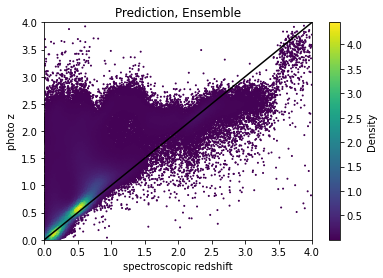

In [213]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, mean_array, c = z, s = 1, edgecolor = None)
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Prediction, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])

(0.0, 4.0)

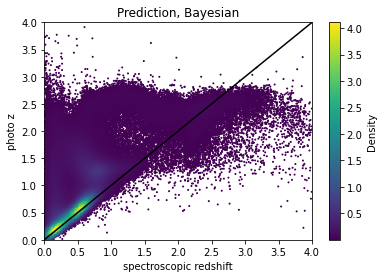

In [214]:
xy_variational = np.asarray(np.vstack([y_test,y_predict_variational_mean])).astype('float32')
z_variational = gaussian_kde(xy_variational)(xy_variational)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, y_predict_variational_mean, c = z_variational, s = 1, edgecolor = None)
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Prediction, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])

Coverage: 0.5669998254189944


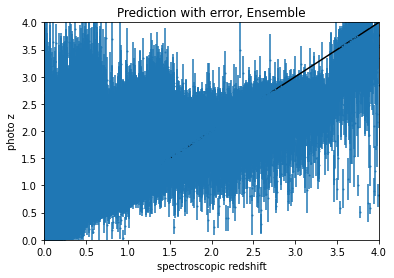

In [215]:
fig, ax = plt.subplots()
error_plot = ax.errorbar(y_test, mean_array, yerr = std_array, fmt="o" ,markersize=1)
plt.title('Prediction with error, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])
print("Coverage: "+str(overlap/len(X_test)))

Coverage: 0.7839167248603351


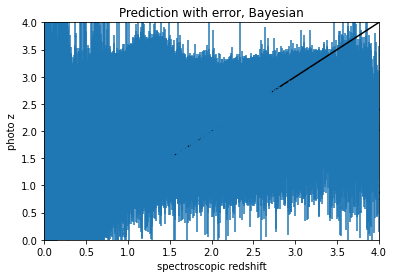

In [216]:
fig, ax = plt.subplots()
error_plot = ax.errorbar(y_test, y_predict_variational_mean, yerr = y_predict_variational_std, fmt="o", markersize=1)
plt.title('Prediction with error, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([0, z_max], [0, z_max],color = 'black')
plt.xlim([0, z_max])
plt.ylim([0, z_max])
print("Coverage: "+str(overlap_variational/len(X_test)))

Coverage: 0.5669998254189944


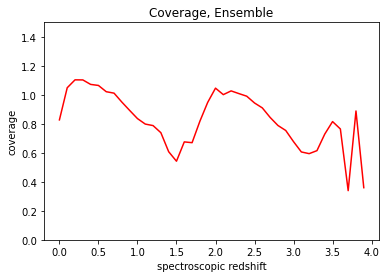

In [217]:
plt.plot(x_array, coverage, c = 'red')
plt.title('Coverage, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('coverage')
plt.ylim([0,1.5])
print("Coverage: "+str(overlap/len(X_test)))

Coverage: 0.7839167248603351


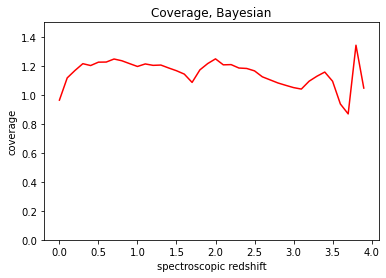

In [218]:
plt.plot(x_array, coverage_variational, c = 'red')
plt.title('Coverage, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('coverage')
plt.ylim([0,1.5])
print("Coverage: "+str(overlap_variational/len(X_test)))

(-1.0, 1.0)

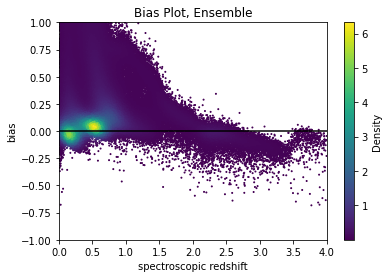

In [219]:
xy_bias = np.asarray(np.vstack([y_test,bias_array])).astype('float32')
z_bias = gaussian_kde(xy_bias)(xy_bias)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, bias_array, c = z_bias, s = 1, edgecolor = None, label = 'Data')
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Bias Plot, Ensemble')
plt.xlabel('spectroscopic redshift')
plt.ylabel('bias')
plt.plot([0, z_max], [0, 0], color = 'black')
plt.xlim([0, z_max])
plt.ylim([-1, 1])

(-1.0, 1.0)

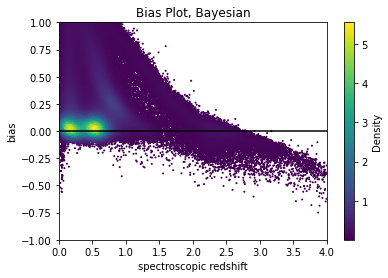

In [220]:
xy_bias_variational = np.asarray(np.vstack([y_test,bias_array_variational])).astype('float32')
z_bias_variational = gaussian_kde(xy_bias_variational)(xy_bias_variational)
fig, ax = plt.subplots()
scatter_plot = ax.scatter(y_test, bias_array_variational, c = z_bias_variational, s = 1, edgecolor = None, label = 'Data')
plt.colorbar(scatter_plot, label = 'Density')
plt.title('Bias Plot, Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('bias')
plt.plot([0, z_max], [0, 0], color = 'black')
plt.xlim([0, z_max])
plt.ylim([-1, 1])

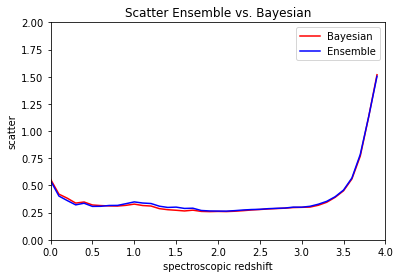

In [221]:
combined_array_scatter_variational = np.transpose(np.vstack((y_test,bias_array_variational)))
sorted_combined_array_scatter_variational = sorted(combined_array_scatter_variational, key=lambda x: x[0])
bins_scatter_variational = int(z_max*10)
splitted_sorted_combined_array_scatter_variational = np.array_split(sorted_combined_array_scatter_variational,bins_scatter_variational)
scatter_array_variational = []
for i in range(0,bins_scatter_variational):
    scatter_variational = np.std(splitted_sorted_combined_array_scatter_variational[i])
    scatter_array_variational.append(scatter_variational)
x_array_scatter = np.arange(0,z_max,z_max/bins)
plt.plot(x_array_scatter, scatter_array_variational, c = 'red', label = 'Bayesian')
plt.plot(x_array_scatter, scatter_array, c = 'blue', label = 'Ensemble')
plt.title('Scatter Ensemble vs. Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('scatter')
plt.xlim([0,z_max])
plt.ylim([0,2])
plt.legend()

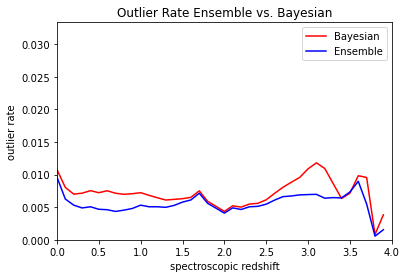

In [222]:
combined_array_outlier_variational = np.transpose(np.vstack((y_test,bias_array_variational)))
sorted_combined_array_outlier_variational = sorted(combined_array_outlier_variational, key=lambda x: x[0])
bins_outlier_variational = int(z_max*10)
splitted_sorted_combined_array_outlier_variational = np.array_split(sorted_combined_array_outlier_variational,bins_outlier_variational)
outlier_array_variational = []
for i in range(0,bins_scatter_variational):
    outlier_count_variational = 0
    for j in range(0,len(splitted_sorted_combined_array_outlier_variational[i])):
        if np.abs(splitted_sorted_combined_array_outlier_variational[i][j][1]) >= 1/4:
            outlier_count_variational += 1
    outlier_array_variational.append(outlier_count_variational/len(X_test))
x_array_outlier = np.arange(0,z_max,z_max/bins)
plt.plot(x_array_outlier, outlier_array_variational, c = 'red', label = 'Bayesian')
plt.plot(x_array_outlier, outlier_array, c = 'blue', label = 'Ensemble')
plt.title('Outlier Rate Ensemble vs. Bayesian')
plt.xlabel('spectroscopic redshift')
plt.ylabel('outlier rate')
plt.xlim([0,z_max])
plt.ylim([0,1/30])
plt.legend()

In [223]:
# END